# Business Problem

## Business Situation

All in One Co. is a multibrand outlet that wants to create a loyality program the best customers called INSIDERS. The company has registered one year of purchasing from its customers and wants to reward those customers with marketing actions. 

Business Questions:
- Who are the customers elegible?
- How many customers will be part of Insiders group?
- What are the main behaviour of those customers?
- How much revenue comes from Insiders customer groups?
- How much revenue is expected from Insiders next month?
- Which conditions one person must comply to be an Insider?
- What removes a customer from Insider group?
- What guarantees the loyality program customers are better than others?
- Which actions MKT team could take to increase revenue?

## Business Understanding & Solution Planning

A) <u>Business problem (open question)</u> - **How could we identify customers to a loyality program?**

B) <u>Business understanding</u>

- **Motivation?** The company wants to identify the most valuable customers in order to promote a loyality program and increase engagement/purchasing from those customers. MKT team wants to address some initiatives to increase revenue from this valuable group. Thus, was requested to Data team to evaluate current purchasing data  and propose tools to help the company build the Insiders program. 

- **Root cause**: Increase revenue

- **Scope**: (closed affirmation): 
  - Firstly: Build a tool to help identify most valuable customers from actual (one year) purchasing database
  - Secondarily: Build a report to answer some business questions and support MKT initiatives. 
  
    
- **Stakeholder**? CFO


- **Acceptance Criteria**: ??

### Planning Solution

**Solution overview**:

 - <u>Kind of problem</u>: Most valuable customers identification in order to frame into loyality program
 - <u>Potential methods</u>: Clustering

#### Inputs

- Business Problem, i.e, identify most valuable customers in order to create a new loyality program and increase revenue through marketing actions
- Products sales data from Nov 2015 to Dec 2017
- Tools: 
    - Python
    - Jupyter Nb
    - Pandas, Seaborn, Sklearn, etc

#### Outputs

- Provide a list of customers that will be part of Insiders Loyality Program:


    - List format:
            client_id | is_insider:
            234213213 | no  / 0
            324325252 | yes / 1
            435345353 | yes / 1
            
            
- Report answering business questions:


    - 1. Who are the customers elegible?
    - 2. How many customers will be part of Insiders group?
    - 3. What are the main behaviour of those customers?
    - 4. How much revenue comes from Insiders customer groups?
    - 5. How much revenue is expected from Insiders next month?
    - 6. Which conditions one person must comply to be an Insider?
    - 7. What removes a customer from Insider group?
    - 8. What guarantees the loyality program customers are better than others?
    - 9. Which actions MKT team could take to increase revenue?

#### Tasks

- 1. Who are the customers elegible?

    - Who is most valuable customers? => Must be evaluated with business experts
        - Revenue:
            - High ticket?
            - High LTV?
            - High frequency?
            - High basket size?
            - Low churn?
        - Cost:
            - Low return rate?
            - Low CAC?
            
        - Experience:
            - High xp evaluation?
            
- 2. How many customers will be part of Insiders group?
        - Total of customers
        - % Insiders
        
- 3. What are the main behaviour of those customers?
        - Stratify customers characteristics and consumptions habits -> clustering features
        
- 4. How much revenue comes from Insiders customer groups?
        - Total revenue
        - Revenue from insiders
        
- 5. How much revenue is expected from Insiders next month?
        - LTV Insiders group
        - Cohort analysis (time, product, etc) 
        
- 6. Which conditions one person must comply to be an Insider?
        - Person must obbey clustering parameters
        - Retrain clustering to identify (1, 3 months)


- 7. What removes a customer from Insider group?
        - Persons that don't follow clustering parameters will be excluded
        - Retrain clustering to identify (1, 3 months)

- 8. What guarantees the loyality program customers are better than others?
        - A/B testing

- 9. Which actions MKT team could take to increase revenue?
        - Special offers, purchasing preference, free shipment, etc
        


#### Solution Benchmarks 

**Desk Research**
- RFM model (Recency, Frequency, Monetary) => MVP
    - Step1: Pick one scope and order customers
    - Step2: Split and rank (R-Score, F-Score, M-Score) the customers according to levels (ex: Lvl 1-5, 20% of customer in each level)
    - Step3: Calculate mean from R-Score, F-Score, M-Score and order
    - See RFM Segmentation and strategies to engage customers

## Project Assumptions

## Others

C) Insights


D) Business Results


E) Conclusion (Objectives reached? Problems faced?)


F) Next Steps

G) Lessons learned

# 0. Imports

In [129]:
import pandas as pd
import inflection

import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.cluster import KMeans
from plotly import express as px

SEED = 42

## 0.1 Helper Functions

## 0.2 Loading Data

In [88]:
#load data
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding = "ISO-8859-1")
#drop undesired column
df_raw = df_raw.drop(columns='Unnamed: 8')

In [89]:
df_raw

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France


# 1. Data Description

In [90]:
df1 = df_raw.copy()

## 1.0 Rename Columns

In [91]:
#transforming to columns to snake_case 
new_cols=[]

for col in df1.columns:
    new_cols.append(inflection.underscore(col))  
    
df1.columns = new_cols 

## 1.1 Data Dimensions

In [92]:
print('The dataset has {} rows'.format(df1.shape[0]))
print('The dataset has {} attributes'.format(df1.shape[1]))

The dataset has 541909 rows
The dataset has 8 attributes


Ok, Pandas is capable to deal with this data volume

## 1.2 Check NAs

In [93]:
df1.isna().sum() / df1.shape[0]

invoice_no      0.000000
stock_code      0.000000
description     0.002683
quantity        0.000000
invoice_date    0.000000
unit_price      0.000000
customer_id     0.249267
country         0.000000
dtype: float64

### 1.2.1 Adjust NAs

In [94]:
#in order to build end-to-end 1st crisp cycle NA will be removed => must be dealt next crisp
df1 = df1.dropna(subset=['description','customer_id'])

In [95]:
df1.isna().sum() / df1.shape[0]

invoice_no      0.0
stock_code      0.0
description     0.0
quantity        0.0
invoice_date    0.0
unit_price      0.0
customer_id     0.0
country         0.0
dtype: float64

In [96]:
print('Removed {:.2f}% of original dataset caused by NAs - Will be dealt later'.format((100-(df1.shape[0]/df_raw.shape[0])*100)))

Removed 24.93% of original dataset caused by NAs - Will be dealt later


## 1.3 Data Types

In [97]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

- invoice_no / stock_code contains letters in its composition => mantain object
- customer_id => adjust to int
- invoice_date => adjust to datetime

### 1.3.1 Adjust Data Types

In [98]:
#invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

#customer_id
df1['customer_id'] = df1['customer_id'].astype('int')

In [99]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [100]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

## 1.4 Check Duplicates / Low Variance

## 1.5 Check Strutural Problems

## 1.6 Check Outliers / Business Knowledge

# 2. Descriptive Statistics

In [101]:
df2 = df1.copy()

# 3. Feature Engineering

In [102]:
df3 = df2.copy()

In [168]:
#RFM
df_ref = df3['customer_id'].drop_duplicates().reset_index(drop=True)

#Recency - Last Day Purchased
df_recency_days = (df3['invoice_date'].max() - df3[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()['invoice_date']).dt.days
df_recency = df3[['customer_id','invoice_date']].groupby('customer_id').max().reset_index().drop(columns='invoice_date')
df_recency = pd.concat([df_recency,df_recency_days],axis=1)
df_recency.columns.values[1] = 'recency_days'

df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')

#Frequency - How Many Times Purchased

df_freq = df3[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_freq.columns.values[1] = 'frequency'

df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')

#Monetary - Gross Revenue
df3['gross_revenue'] = df3['quantity'] * df3['unit_price']
df3_monetary = df3[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()

df_ref = pd.merge(df_ref, df3_monetary, on='customer_id',how='left')


In [169]:
df_freq

,customer_id,frequency
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4367,18280,1
4368,18281,1
4369,18282,3
4370,18283,16


# 4. Feature Filtering

In [104]:
df4 = df_ref.copy()

## 4.1 Columns 

## 4.2 Rows 

# 5. Exploratory Data Analysis

In [105]:
df5 = df4.copy()

# 6. Data Preparation

In [106]:
df6 = df5.copy()

# 7. Feature Selection

In [107]:
df7 = df6.copy()

# 8. HP Fine Tuning (cluster definition)

In [108]:
X= df7.drop(columns='customer_id')

## WSS (Within Cluster Sum of Squares)

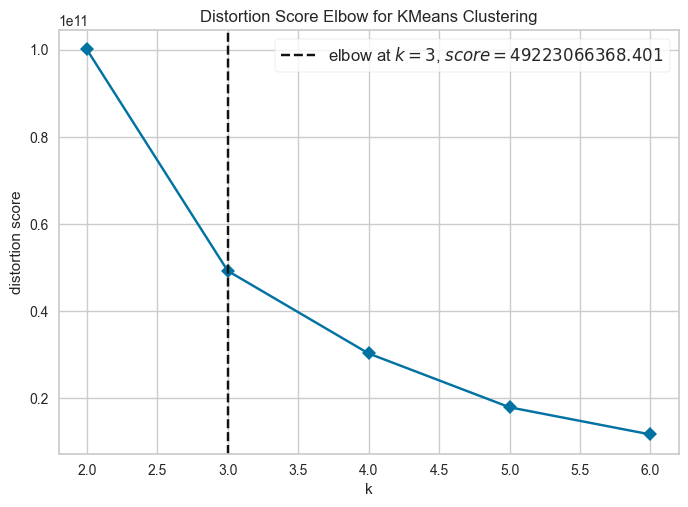

In [109]:
clusters = [2,3,4,5,6]
kmeans = KElbowVisualizer (KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

## Sillhoutte Score 

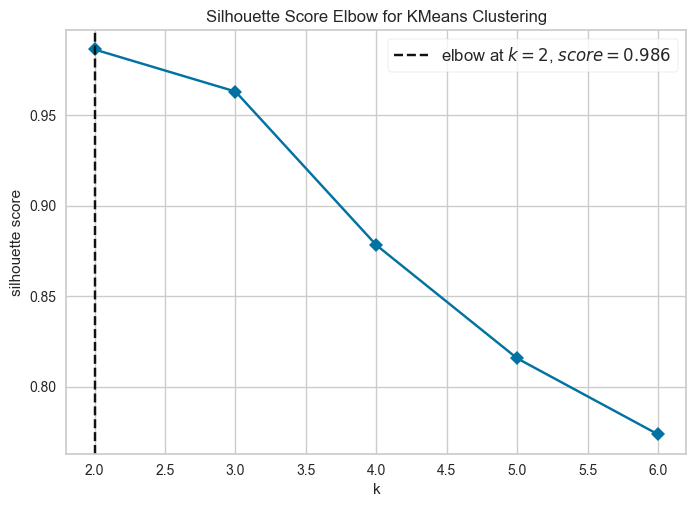

In [110]:
silhoutte = KElbowVisualizer(KMeans(), k=clusters, metric='silhouette',timings=False)
silhoutte.fit(X)
silhoutte.show();

<h3> In this case, k=2 and k=3 performed well and can be used on k to train our model - In this case, we will pick 3 clusters</h3>

# 9. Model Training

## 9.1 K-Means

In [114]:
#previous defined num clusters
k = 3

In [115]:
#model definition
kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=SEED)

#model training
kmeans.fit(X)

#clustering
labels = kmeans.labels_

### 9.1.2 Cluster Validation (Performance)

In [121]:
#WSS
print('WSS value {}'.format(kmeans.inertia_))

#Silhoutte
print('Silhouette Score value {}'.format(metrics.silhouette_score(X, labels, metric='euclidean')))


WSS value 52830442008.00694
Silhouette Score value 0.9494677566681542


# 10. Cluster Analysis

## 10.1 Visualization Inspection

In [125]:
df10 = df7.copy()
df10['cluster'] = labels
df10.head()

,customer_id,recency_days,frequency,gross_revenue,cluster
0,17850,302,35,5288.63,0
1,13047,31,18,3079.10,0
2,12583,2,18,7187.34,0
3,13748,95,5,948.25,0
4,15100,330,6,635.10,0


In [156]:
fig = px.scatter_3d(df10, x='recency_days', y='frequency', z='gross_revenue',color='cluster')
fig.show()

## 10.2 Cluster Profile

In [133]:
df10.head()

,customer_id,recency_days,frequency,gross_revenue,cluster
0,17850,302,35,5288.63,0
1,13047,31,18,3079.10,0
2,12583,2,18,7187.34,0
3,13748,95,5,948.25,0
4,15100,330,6,635.10,0


In [166]:
#Number of Customers
df_cluster = df10[['customer_id', 'cluster']].groupby('cluster').count().reset_index().rename(columns={'customer_id':'qty_customers'})
df_cluster['perc_customers'] = (df_cluster['qty_customers'] / df_cluster['qty_customers'].sum())*100

# Average Gross Revenue
df_gr = df10[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index().rename(columns={'gross_revenue':'avg_revenue'})
df_cluster = pd.merge(df_cluster,df_gr, on='cluster', how='left')
 
#Average Recency
df_rec = df10[['recency_days', 'cluster']].groupby('cluster').mean().reset_index().rename(columns={'recency_days':'avg_recency'})
df_cluster = pd.merge(df_cluster,df_rec, on='cluster', how='left')

# Average Frequency
df_fre = df10[['frequency', 'cluster']].groupby('cluster').mean().reset_index().rename(columns={'frequency':'avg_frequency'})
df_cluster = pd.merge(df_cluster,df_fre, on='cluster', how='left')

In [167]:
df_cluster

,cluster,qty_customers,perc_customers,avg_revenue,avg_recency,avg_frequency
0,0,4335,99.153705,1372.577826,92.257901,4.614533
1,1,6,0.137237,182181.981667,7.166667,89.000000
2,2,31,0.709058,40543.517742,13.290323,53.290323


### Cluster 01 (Insiders Eligible):
        - Customers Quantity: 6 (0.14% total)
        - Average Recency: 7 days
        - Average Frequency: 89 purchases
        - Average Revenue: $182.181

### Cluster 02:
        - Customers Quantity: 31 (0.71% total)
        - Average Recency: 13 days
        - Average Frequency: 53 purchases
        - Average Revenue: $40.543


### Cluster 03:
        - Customers Quantity: 4335 (99,15% total)
        - Average Recency: 92 days
        - Average Frequency: 5 purchases
        - Average Revenue: $1.372

# 11. Model Deployment